In [1]:
%load_ext autoreload  
%autoreload 2
%config InlineBackend.figure_format='retina'

Text(0.5, 1.0, '$y = m x^2$')

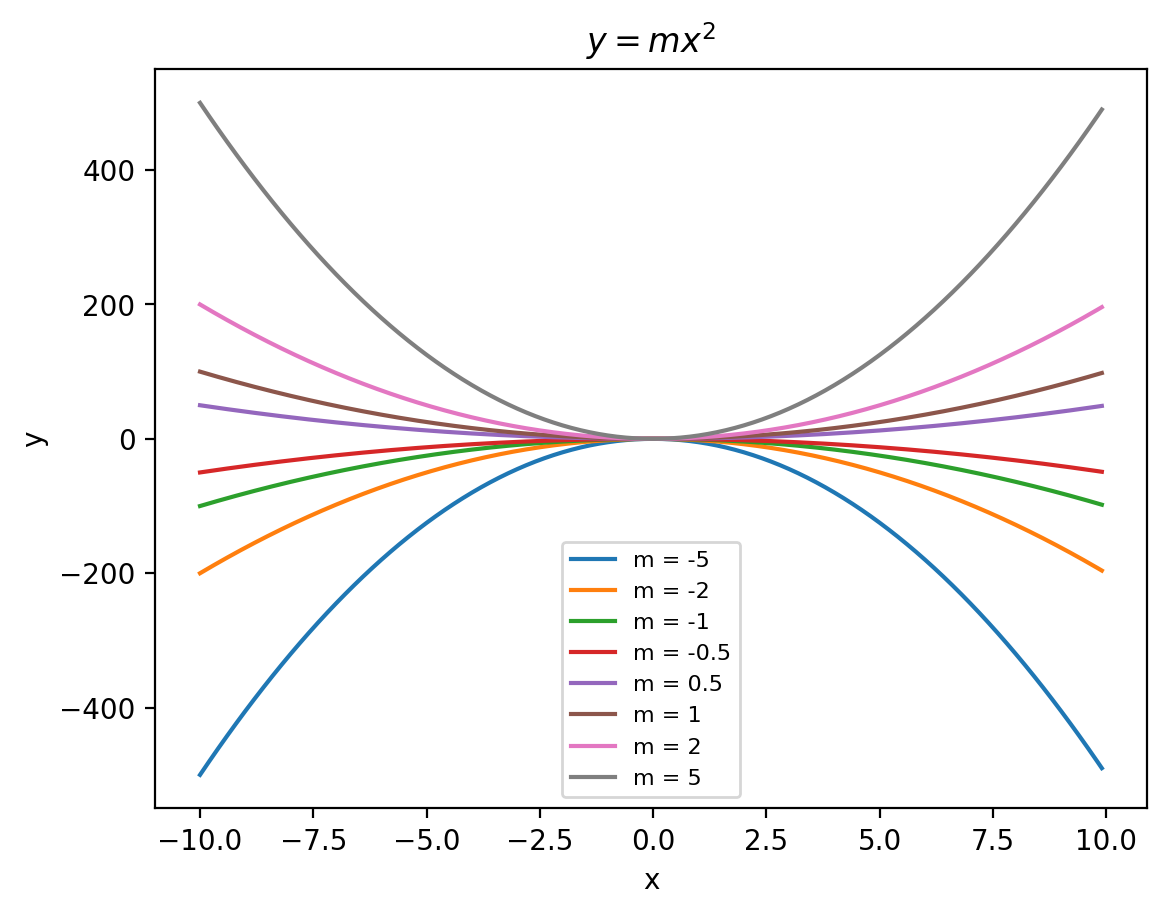

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10, 0.1)
y = x**2

for _m in [-5, -2, -1, -0.5, 0.5, 1, 2, 5]:
    plt.plot(x, y*_m, label=f'm = {_m}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=8)
plt.title(r'$y = m x^2$')

Matrix A with a12 = 0 is positive definite (determinant = 1.0).
Matrix A with a12 = 1 is not positive definite (determinant = 0.0).
The quadratic form may not be convex.
Matrix A with a12 = -1 is not positive definite (determinant = 0.0).
The quadratic form may not be convex.
Matrix A with a12 = 2 is not positive definite (determinant = -2.9999999999999996).
The quadratic form may not be convex.


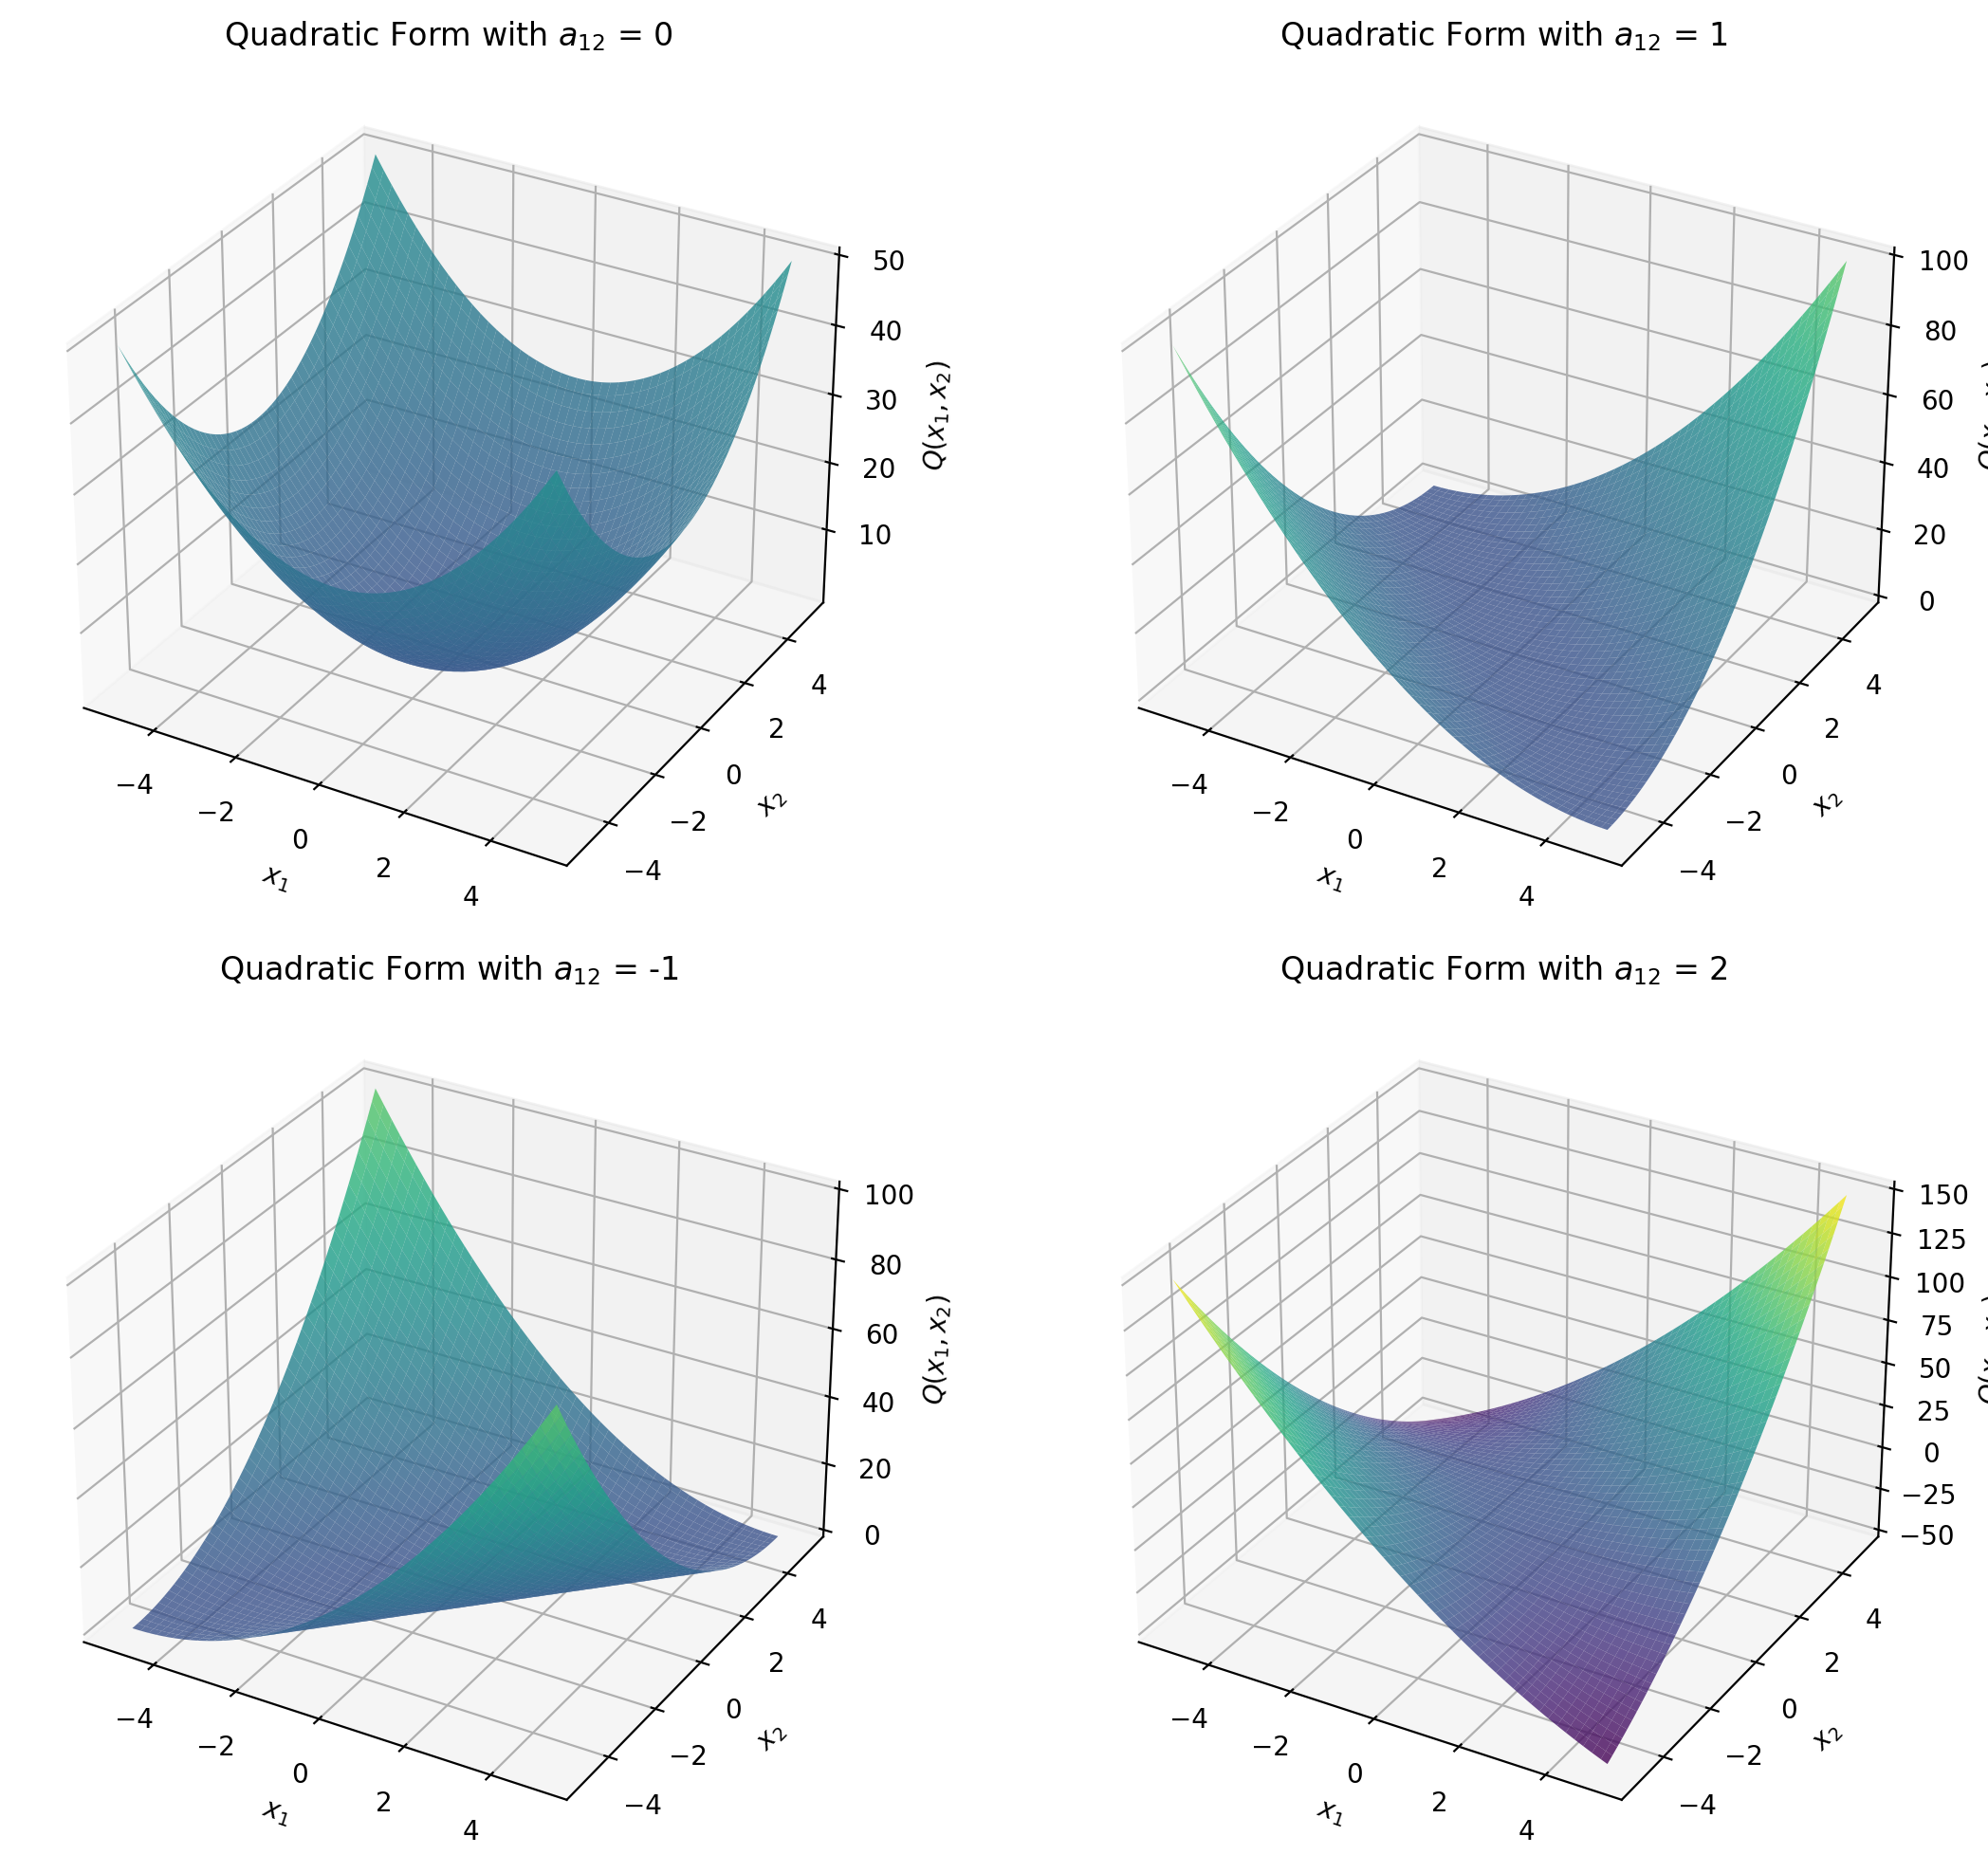

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the quadratic form function
def quadratic_form(x1, x2, A):
    # Stack x1 and x2 into a 2xN array
    X = np.array([x1, x2])
    # Compute Q(x) = x^T A x
    return np.einsum('ij,ji->i', X.T @ A, X)

# Set up the grid of x1 and x2 values
x1_range = np.linspace(-5, 5, 200)
x2_range = np.linspace(-5, 5, 200)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Define the symmetric matrix A parameters
a11 = 1
a22 = 1
a12_values = [0, 1, -1, 2, -2]  # Different interaction terms to visualize

# Prepare figure and axes for subplots
fig = plt.figure(figsize=(12, 10))
num_subplots = 4  # Number of subplots to create
num_rows = 2
num_cols = 2

# Precompute Q(x) for each a12 and find global min and max for consistent color scaling
Q_list = []
Q_min = np.inf
Q_max = -np.inf

for a12 in a12_values[:num_subplots]:
    A = np.array([[a11, a12],
                  [a12, a22]])
    # Compute Q(x1, x2)
    Q = quadratic_form(x1.flatten(), x2.flatten(), A)
    Q = Q.reshape(x1.shape)
    Q_list.append((a12, A, Q))
    Q_min = min(Q_min, Q.min())
    Q_max = max(Q_max, Q.max())

# Plot the quadratic forms in subplots
for idx, (a12, A, Q) in enumerate(Q_list):
    # Check if A is positive definite
    det = np.linalg.det(A)
    if det <= 0:
        print(f"Matrix A with a12 = {a12} is not positive definite (determinant = {det}).")
        print("The quadratic form may not be convex.")
    else:
        print(f"Matrix A with a12 = {a12} is positive definite (determinant = {det}).")

    # Create a subplot
    ax = fig.add_subplot(num_rows, num_cols, idx + 1, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(x1, x2, Q, cmap=cm.viridis, alpha=0.8, edgecolor='none',
                           vmin=Q_min, vmax=Q_max)
    ax.set_title(f'Quadratic Form with $a_{{12}}$ = {a12}')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$Q(x_1, x_2)$')

    # Optional: Add colorbar for each subplot
    # fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()